In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [5]:
df.shape

(1340, 10)

In [6]:
pd.set_option("display.float_format","{:.2f}".format)

In [7]:
df

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.00,female,35.50,88,Yes,0,Yes,northwest,55135.40
1336,1337,59.00,female,38.10,120,No,1,Yes,northeast,58571.07
1337,1338,30.00,male,34.50,91,Yes,3,Yes,northwest,60021.40
1338,1339,37.00,male,30.40,106,No,0,Yes,southeast,62592.87


In [8]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(1332, 10)

In [13]:
df.describe()

,Id,age,bmi,bloodpressure,children,claim
count,1332.00,1332.00,1332.00,1332.00,1332.00,1332.00
mean,674.47,38.09,30.66,94.19,1.10,13325.25
std,384.70,11.11,6.12,11.45,1.21,12109.62
min,1.00,18.00,16.00,80.00,0.00,1121.87
25%,341.75,29.00,26.20,86.00,0.00,4760.16
50%,674.50,38.00,30.35,92.00,1.00,9412.97
75%,1007.25,47.00,34.73,99.00,2.00,16781.33
max,1340.00,60.00,53.10,140.00,5.00,63770.43


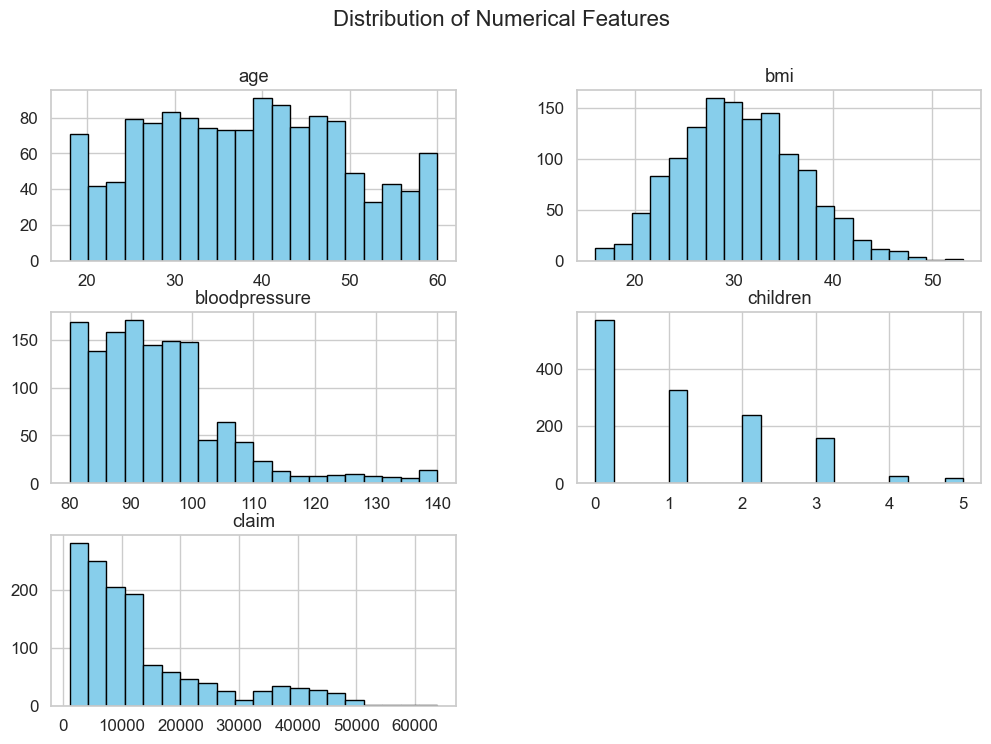

In [14]:
numeric_cols = ["age", "bmi", "bloodpressure", "children", "claim"]
df[numeric_cols].hist(bins=20, figsize=(12,8), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

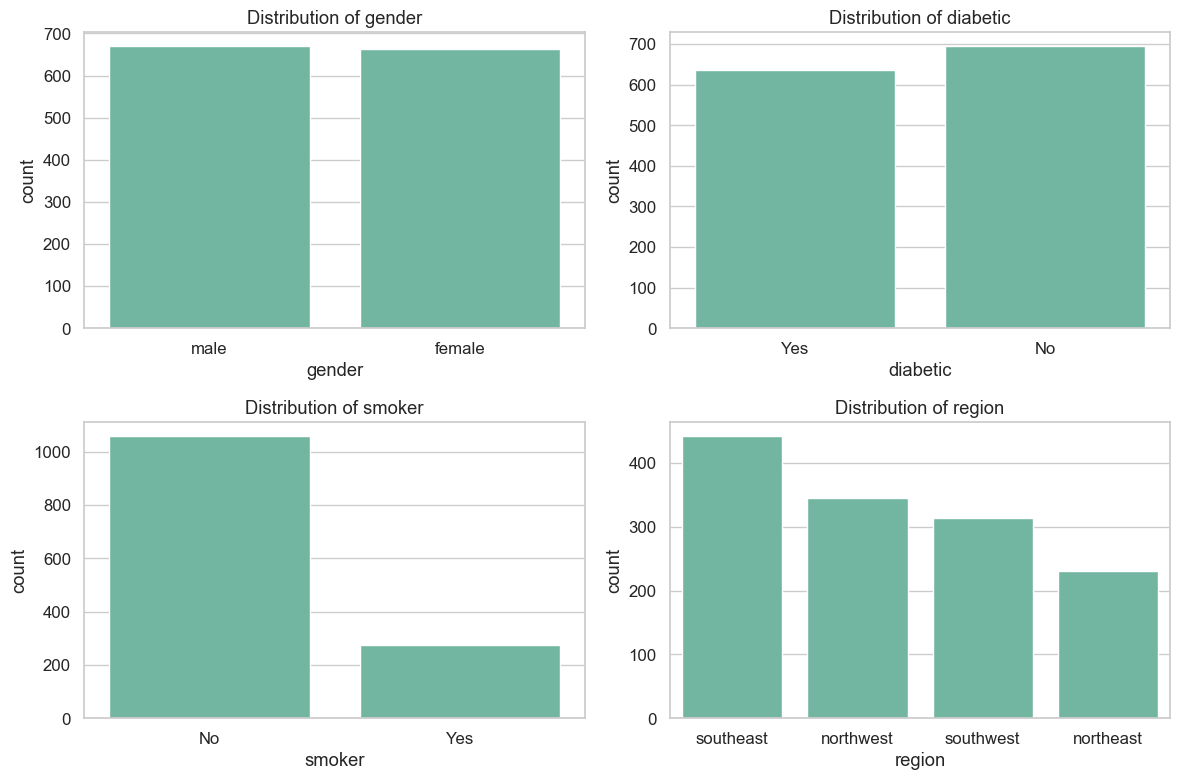

In [15]:
categoric_cols = ["gender", "diabetic", "smoker", "region"]

plt.figure(figsize=(12,8))

for i, col in enumerate(categoric_cols,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [16]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

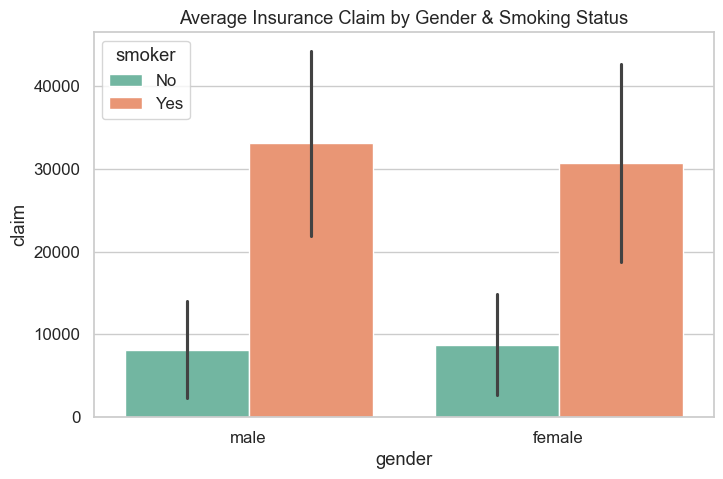

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="gender", y="claim", hue="smoker", estimator="mean", errorbar="sd")
plt.title("Average Insurance Claim by Gender & Smoking Status")
plt.show()

In [18]:
pivot_region_diabetic = df.groupby(["region", "diabetic"])["claim"].mean().unstack()
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


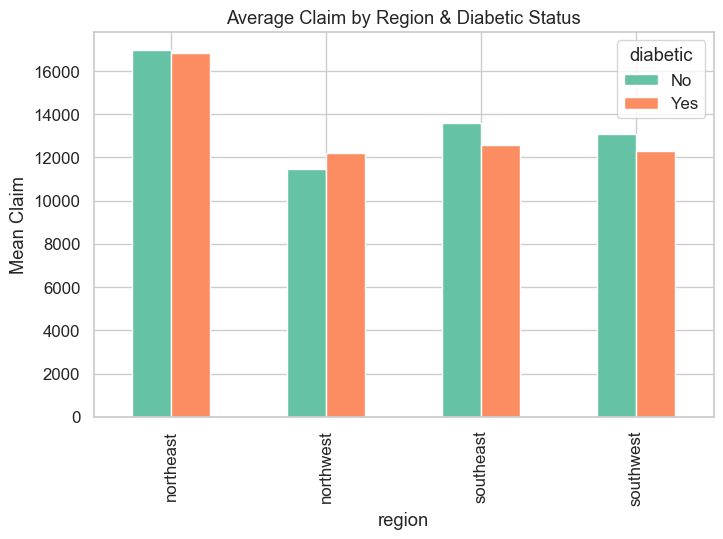

In [19]:
pivot_region_diabetic.plot(kind="bar", figsize=(8,5))
plt.title("Average Claim by Region & Diabetic Status")
plt.ylabel("Mean Claim")
plt.show()

In [20]:
pivot_table = pd.pivot_table(df, values="claim", index="region", columns="smoker", aggfunc="mean")
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [21]:
pivot_table = pd.pivot_table(df, values="claim", index="children", columns="diabetic", aggfunc="mean")
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


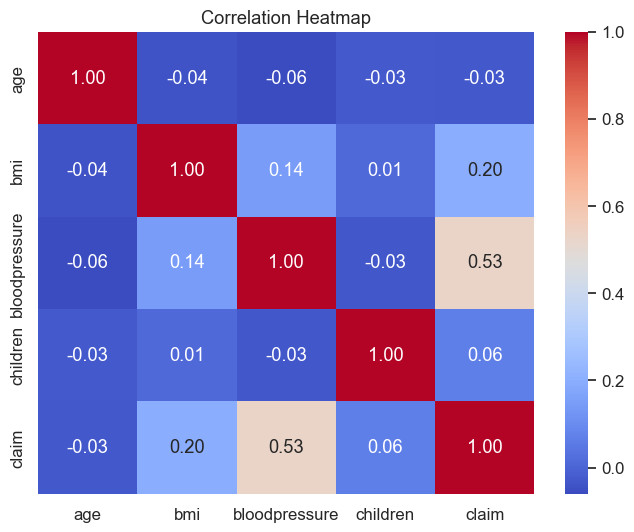

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

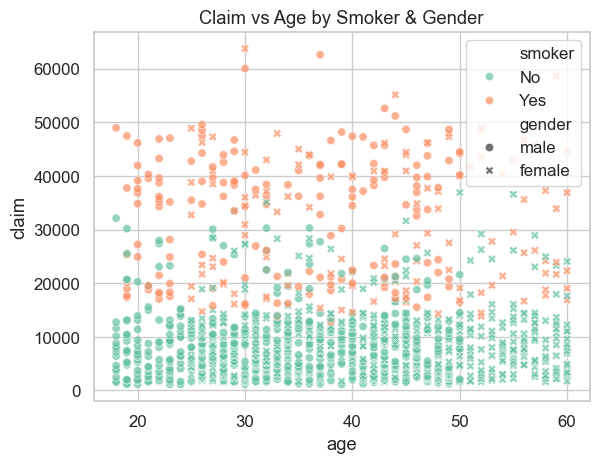

In [23]:
sns.scatterplot(data=df, x="age", y="claim", hue="smoker", style="gender", alpha=0.7)
plt.title("Claim vs Age by Smoker & Gender")
plt.show()

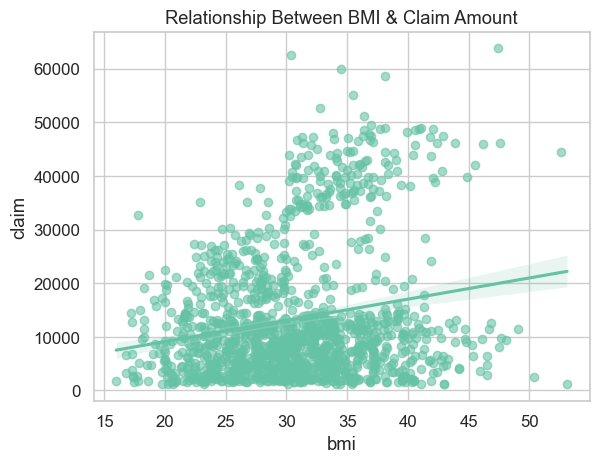

In [24]:
sns.regplot(data=df, x="bmi", y="claim", scatter_kws={"alpha":0.6})
plt.title("Relationship Between BMI & Claim Amount")
plt.show()

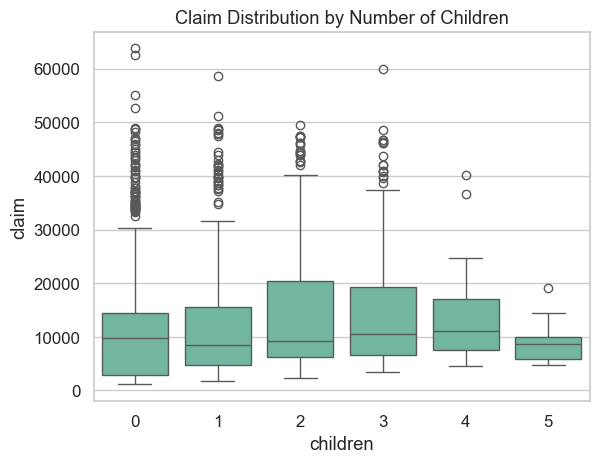

In [25]:
sns.boxplot(data=df, x="children", y="claim")
plt.title("Claim Distribution by Number of Children")
plt.show()

In [26]:
df["age_group"] = pd.cut(df["age"], bins=[0,18,30,45,60,100], labels=["<18","18-30","31-45","46-60","60+"])

In [27]:
df["age_group"].value_counts()

age_group
31-45    553
46-60    383
18-30    380
<18       16
60+        0
Name: count, dtype: int64

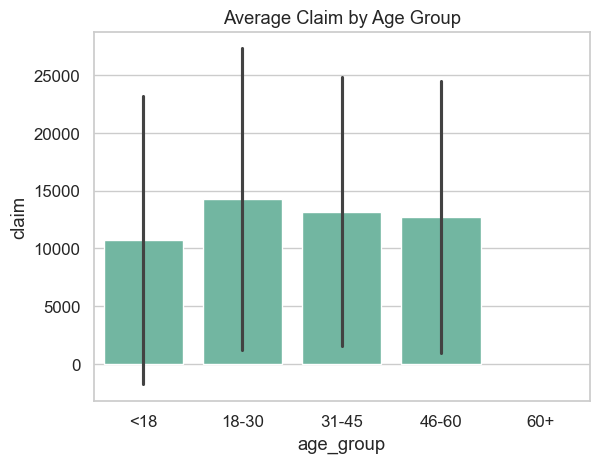

In [28]:
sns.barplot(data=df, x="age_group", y="claim", estimator="mean", errorbar="sd")
plt.title("Average Claim by Age Group")
plt.show()

In [29]:
df["bmi_category"] = pd.cut(df["bmi"], bins=[0,18.5,24.9,29.9,100], labels=["Underweight","Normal","Overweight","Obese"])

In [30]:
df["bmi_category"].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

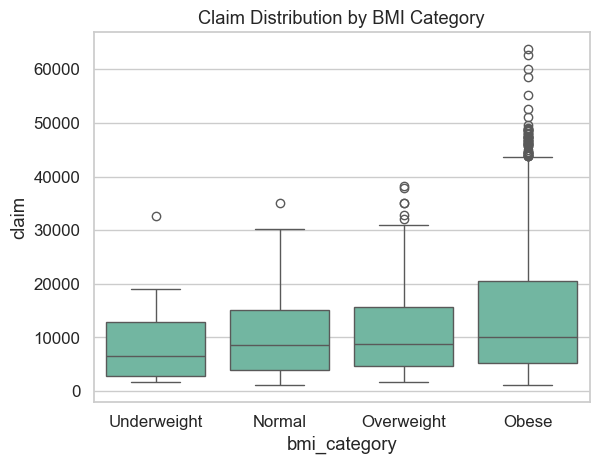

In [31]:
sns.boxplot(data=df, x="bmi_category", y="claim")
plt.title("Claim Distribution by BMI Category")
plt.show()

In [32]:
region_stats = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x=="Yes").mean()*100),
    mean_claim = ("claim", "mean")
).reset_index()

region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


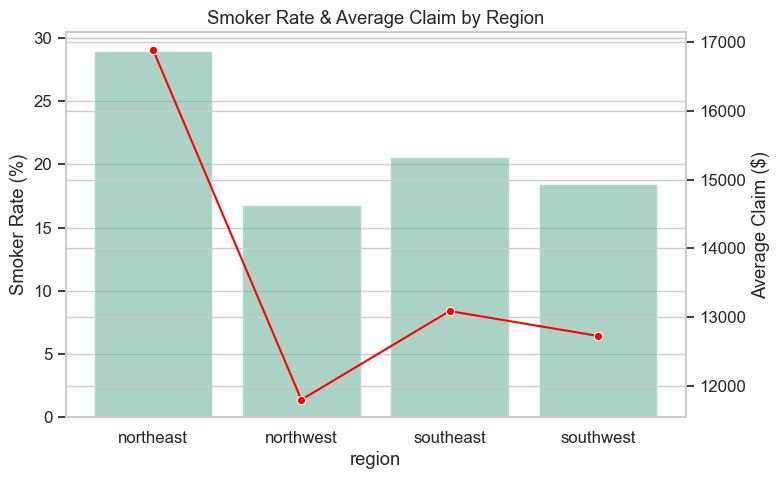

In [33]:
fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data=region_stats, x="region", y="smoker_rate", ax=ax1, alpha=0.6)
ax2 = ax1.twinx()
sns.lineplot(data=region_stats, x="region", y="mean_claim", color="red", marker="o")

ax1.set_ylabel("Smoker Rate (%)")
ax2.set_ylabel("Average Claim ($)")
plt.title("Smoker Rate & Average Claim by Region")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [35]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [37]:
X = df[['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children', 'smoker']]
y = df['claim']

In [38]:
cat_cols = ['gender', 'diabetic', 'smoker']
label_encoders = {}

In [39]:
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f"label_encoder_{col}.pkl")

C:\Users\HAATHIM MANAF\AppData\Local\Temp\ipykernel_14352\1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\HAATHIM MANAF\AppData\Local\Temp\ipykernel_14352\1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\HAATHIM MANAF\AppData\Local\Temp\ipykernel_14352\1530066519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
num_cols = ['age', 'bmi', 'bloodpressure', 'children']
scaler = StandardScaler()

In [42]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [43]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [44]:
print(X_train.shape, y_train.shape)

(1065, 7) (1065,)


In [45]:
print(X_test.shape, y_test.shape)

(267, 7) (267,)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [47]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {"R2": r2, "MAE": mae, "RSME": rmse}

In [48]:
results = {}

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)
results["Linear Rgeression"] = evaluate_model(lr, X_train, X_test, y_train, y_test)
print("Linear Regression model trained")

best_poly_model = None
best_poly_score = -np.inf
for degree in [2,3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, y_train)

    score = poly_lr.score(X_test_poly, y_test)

    if score > best_poly_score:
        best_poly_score = score
        best_poly_model = (degree, poly, poly_lr)

degree, poly, poly_lr = best_poly_model

results[f"Polynomial Regression (deg = {degree})"] = evaluate_model(poly_lr, poly.fit_transform(X_train), poly.transform(X_test), y_train, y_test)
print("Polynomial Regression models trained")

rf = RandomForestRegressor()

rf_params = {
    "n_estimators": [100,200],
    "max_depth": [None,10,20],
    "min_samples_split": [2,5],
    "min_samples_leaf": [1,2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring="r2", n_jobs=-1, verbose=0)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

results["Random Forest"] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
print("Random Forest training is completed, best parameters", rf_grid.best_params_)

svr = SVR()

svr_params = {
    "kernel": ["rbf","poly","linear"],
    "C": [1,10,50],
    "epsilon": [0.1,0.2,0.5],
    "degree": [2,3]
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring="r2", n_jobs=-1, verbose=0)
svr_grid.fit(X_train, y_train)
best_svr = svr_grid.best_estimator_

results["SVR"]  = evaluate_model(best_svr, X_train, X_test, y_train, y_test)
print("CVR training is completed, best parameters", svr_grid.best_params_)

xgb = XGBRegressor(objective="reg:squarederror")

xgb_params = {
    "n_estimators": [100,200],
    "max_depth": [3,5,7],
    "learning_rate": [0.01,0.05,0.1],
    "subsample": [0.8,1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring="r2", n_jobs=-1, verbose=0)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

results["XGBoost"] = evaluate_model(best_xgb, X_train, X_test, y_train, y_test)
print("XGBoost training is completed, best parameters", xgb_grid.best_params_)

Linear Regression model trained
Polynomial Regression models trained
Random Forest training is completed, best parameters {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
CVR training is completed, best parameters {'C': 50, 'degree': 2, 'epsilon': 0.1, 'kernel': 'linear'}
XGBoost training is completed, best parameters {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [54]:
results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
results_df

,R2,MAE,RSME
XGBoost,0.84,3982.48,5350.66
Random Forest,0.83,4131.93,5462.84
Polynomial Regression (deg = 2),0.81,4365.12,5706.81
Linear Rgeression,0.75,4971.61,6612.27
SVR,0.53,6207.16,9069.89


In [55]:
models = {
    "Linear Regression": lr,
    "Polynomial Regression": poly_lr,
    "Random Forest": best_rf,
    "SVR": best_svr,
    "XGBoost": best_xgb
}

In [56]:
best_r2 = results_df["R2"].max()
best_r2

0.8350049777161338

In [59]:
top_model = results_df[results_df["R2"]==best_r2]
top_model

,R2,MAE,RSME
XGBoost,0.84,3982.48,5350.66


In [60]:
best_model = models[top_model.index[0]]
best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [61]:
joblib.dump(best_model, "best_model.pkl")
print(f"Best model selected: {top_model.index[0]}")

Best model selected: XGBoost
